In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [434]:
with open("IMDb_Scrape.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

# 3.1

In [406]:
# 3.1

df['Ones'] = 1
X = df.Ones
y = df.Score
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 04 Oct 2016   Prob (F-statistic):                nan
Time:                        15:48:13   Log-Likelihood:                -3026.9
No. Observations:                2332   AIC:                             6056.
Df Residuals:                    2331   BIC:                             6062.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones           6.8863      0.018    375.215      0.000         6.850     6.922
==============================================================================
Omnibus:                      220.955   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.378
Skew:                          -0.647   Prob(JB):                     3.11e-87
Kurtosis:                       4.558   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

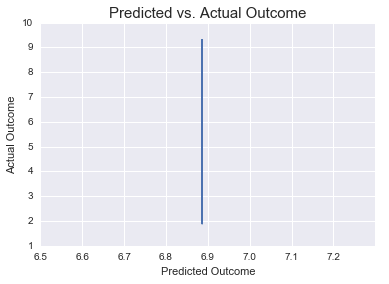

In [407]:
y_predicted = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.plot(y_predicted, y);

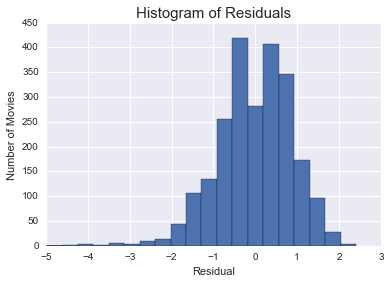

In [408]:
residuals = y - fit.predict(X)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(residuals, bins = 20, normed=0);

The model is simply predicting the mean of the IMDb score for every movie, which is around 6.88. The residuals of the predictions is distributed normally with mean of 0 and standard deviation of 1. It's also slightly skewed to the left.

# 3.2

In [413]:
# 3.2

X = df['Domestic Gross (million USD)']
X = sm.add_constant(X)
y = df.Score
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     15.65
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           7.85e-05
Time:                        15:49:12   Log-Likelihood:                -3019.1
No. Observations:                2332   AIC:                             6042.
Df Residuals:                    2330   BIC:                             6054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                            6.8198      0.025    274.451      0.000         6.771     6.868
Domestic Gross (million USD)     0.0009      0.000      3.956      0.000         0.000     0.001
==============================================================================
Omnibus:                      218.530   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.631
Skew:                          -0.649   Prob(JB):                     3.01e-84
Kurtosis:                       4.508   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

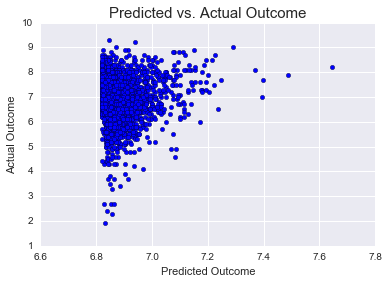

In [414]:
y_predicted = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.scatter(y_predicted, y);

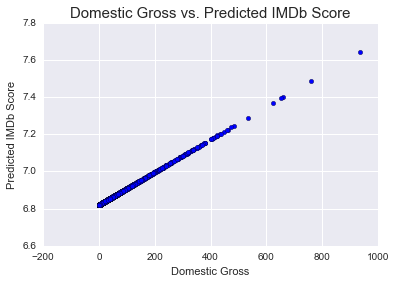

In [418]:
plt.title('Domestic Gross vs. Predicted IMDb Score', fontsize = 15)
plt.xlabel('Domestic Gross')
plt.ylabel('Predicted IMDb Score')
plt.scatter(X['Domestic Gross (million USD)'], y_predicted);

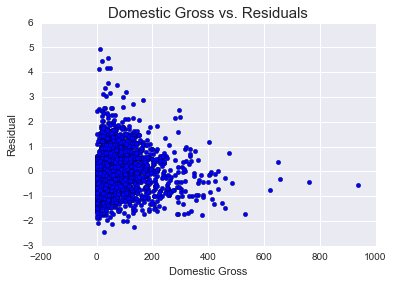

In [420]:
residual = y_predicted - y
plt.title('Domestic Gross vs. Residuals', fontsize = 15)
plt.xlabel('Domestic Gross')
plt.ylabel('Residual')
plt.scatter(X['Domestic Gross (million USD)'], residual);

The model is simply predicting a higher IMDb score for movies with higher domestic gross. This means that domestic gross alone is not a sufficient predictor for IMDb score.

# 3.3

In [435]:
# 3.3

df['G'] = (df['MPAA Certification'] == 'G').astype(int)
df['PG'] = (df['MPAA Certification'] == 'PG').astype(int)
df['PG-13'] = (df['MPAA Certification'] == 'PG-13').astype(int)
df['R'] = (df['MPAA Certification'] == 'R').astype(int)

In [467]:
X = df[['G', 'PG', 'PG-13', 'R']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     45.01
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           1.86e-36
Time:                        16:28:34   Log-Likelihood:                -2940.0
No. Observations:                2332   AIC:                             5890.
Df Residuals:                    2327   BIC:                             5919.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.6308      0.106     71.989      0.000         7.423     7.839
G             -0.2491      0.162     -1.541      0.123        -0.566     0.068
PG            -0.7824      0.117     -6.715      0.000        -1.011    -0.554
PG-13         -1.0125      0.110     -9.196      0.000        -1.228    -0.797
R             -0.5963      0.109     -5.463      0.000        -0.810    -0.382
==============================================================================
Omnibus:                      206.711   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.527
Skew:                          -0.611   Prob(JB):                     4.70e-82
Kurtosis:                       4.537   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [424]:
mean_score_G = df[df['G'] == 1].Score.mean()
mean_score_PG = df[df['PG'] == 1].Score.mean()
mean_score_PG13 = df[df['PG-13'] == 1].Score.mean()
mean_score_R = df[df['R'] == 1].Score.mean()

mean_error_G = df[df['G'] == 1].Score.std() / df[df['G'] == 1].Score.count()**0.5 
mean_error_PG = df[df['PG'] == 1].Score.std() / df[df['PG'] == 1].Score.count()**0.5 
mean_error_PG13 = df[df['PG-13'] == 1].Score.std() / df[df['PG-13'] == 1].Score.count()**0.5 
mean_error_R = df[df['R'] == 1].Score.std() / df[df['R'] == 1].Score.count()**0.5 

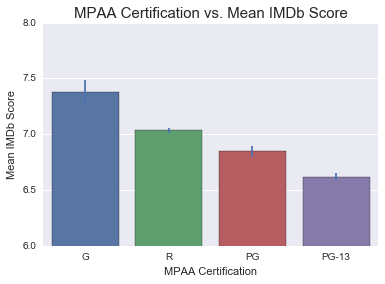

In [425]:
plt.title('MPAA Certification vs. Mean IMDb Score', fontsize = 15)
plt.xlabel('MPAA Certification')
plt.ylabel('Mean IMDb Score')
plt.ylim([6,8])

sns.barplot(['G', 'R', 'PG', 'PG-13'], [mean_score_G, mean_score_R, mean_score_PG, mean_score_PG13], yerr = [mean_error_G, mean_error_R, mean_error_PG, mean_error_PG13]);

The categorical variable of MPAA Certification alone is not a very good predictor of IMDb score. The R-squared value is only 0.07.

# 3.4

In [436]:
# 3.4

# Creating many secondary features
df['2'] = (df.Title.apply(lambda x: '2' in x)).astype(int)
df['3'] = (df.Title.apply(lambda x: '3' in x)).astype(int)
df['4'] = (df.Title.apply(lambda x: '4' in x)).astype(int)
df['Colon'] = (df.Title.apply(lambda x: ':' in x)).astype(int)
df['The'] = (df.Title.apply(lambda x: 'The' in x)).astype(int)
df['Title Length'] = (df.Title.apply(lambda x: len(x.split()))).astype(int)
df['Number of Directors'] = (df.Directors.apply(lambda x: len(x.split(',')))).astype(int)
df['Christopher Nolan'] = (df.Directors == 'Christopher Nolan').astype(int)
df['Adam Sandler'] = (df.Stars.apply(lambda x: 'Adam Sandler' in x)).astype(int)
df['Akira Kurosawa'] = (df.Directors == 'Akira Kurosawa').astype(int)
df['Quentin Tarantino'] = (df.Directors == 'Quentin Tarantino').astype(int)
df['Alfred Hitchcock'] = (df.Directors == 'Alfred Hitchcock').astype(int)
df['Animation']  = (df.Genres.apply(lambda x: 'Animation' in x)).astype(int)

In [486]:
# Re-order dataframe to have score first
df = pd.DataFrame(df.loc[:,'Score']).join((df.loc[:, 'Title':'Stars']).join(df.loc[:, 'G':]))
df

,Score,Title,Release Year,Domestic Gross (million USD),MPAA Certification,Runtime,Number of Votes,Genres,Directors,Stars,...,Colon,The,Title Length,Number of Directors,Christopher Nolan,Adam Sandler,Akira Kurosawa,Quentin Tarantino,Alfred Hitchcock,Animation
0,6.7,Suicide Squad,2016,320.85,PG-13,123,219255,"Action, Adventure, Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",...,0,0,2,1,0,0,0,0,0,0
1,8.0,Captain America: Civil War,2016,408.08,PG-13,147,323106,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Chris Evans, Robert Downey Jr., Scarlett Johan...",...,1,0,4,2,0,0,0,0,0,0
2,7.2,X-Men: Apocalypse,2016,155.33,PG-13,144,189465,"Action, Adventure, Sci-Fi",Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",...,1,0,2,1,0,0,0,0,0,0
3,8.1,Zootopia,2016,341.26,PG,108,201262,"Animation, Adventure, Comedy","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,0,0,1,3,0,0,0,0,0,1
4,7.6,The Jungle Book,2016,364.00,PG,106,141465,"Adventure, Drama, Family",Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",...,0,1,3,1,0,0,0,0,0,0
5,5.4,Ghostbusters,2016,127.45,PG-13,116,91482,"Action, Comedy, Fantasy",Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,...",...,0,0,1,1,0,0,0,0,0,0
6,6.7,The Secret Life of Pets,2016,364.33,PG,87,52894,"Animation, Adventure, Comedy","Yarrow Cheney, Chris Renaud","Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",...,0,1,5,2,0,0,0,0,0,1
7,8.1,The Revenant,2015,183.64,R,156,428618,"Adventure, Drama, Thriller",Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",...,0,1,2,1,0,0,0,0,0,0
8,7.1,Warcraft,2016,47.17,PG-13,123,140547,"Action, Adventure, Fantasy",Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",...,0,0,1,1,0,0,0,0,0,0
9,6.4,The Legend of Tarzan,2016,126.59,PG-13,110,66031,"Action, Adventure, Drama",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",...,0,1,4,1,0,0,0,0,0,0


In [518]:
X = df.ix[:, [2,3,5,11,12,13]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          1.54e-133
Time:                        16:54:24   Log-Likelihood:                -2709.6
No. Observations:                2332   AIC:                             5433.
Df Residuals:                    2325   BIC:                             5473.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                           33.6822      3.086     10.914      0.000        27.630    39.734
Release Year                    -0.0140      0.002     -9.053      0.000        -0.017    -0.011
Domestic Gross (million USD)     0.0010      0.000      4.459      0.000         0.001     0.001
Runtime                          0.0145      0.001     17.646      0.000         0.013     0.016
PG                              -0.4699      0.088     -5.352      0.000        -0.642    -0.298
PG-13                           -0.7155      0.084     -8.542      0.000        -0.880    -0.551
R                               -0.2672      0.082     -3.266      0.001        -0.428    -0.107
==============================================================================
Omnibus:                      261.792   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.352
Skew:                          -0.719   Prob(JB):                    1.11e-110
Kurtosis:                       4.773   Cond. No.                     3.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding several new features increased the R-squared value significantly.

# 3.5

In [519]:
# 3.5

from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

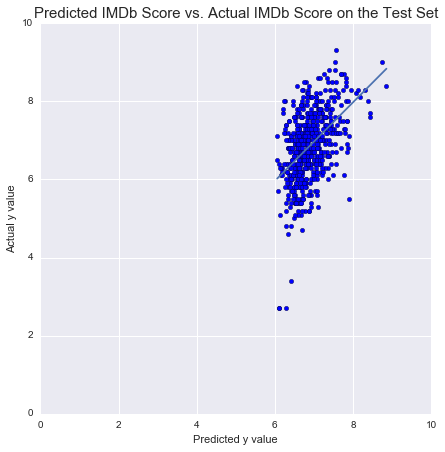

In [563]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25)
y_predicted = fit.predict(X_test)

plt.figure(figsize=(7,7))
plt.title('Predicted IMDb Score vs. Actual IMDb Score on the Test Set', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.xlabel('Predicted y value')
plt.ylabel('Actual y value')
plt.scatter(y_predicted, y_test)
plt.plot(np.unique(y_predicted), np.poly1d(np.polyfit(y_predicted, y_test, 1))(np.unique(y_predicted)));

In [550]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.21123588548988115

The adjusted R-squared value of the test data is 0.211, which is slightly lower than that of the entire data.

The model performs only slightly worse on the test set, which means it is not suffering from overfitting. 